In [1]:
#####
# Proyecto Final: Census data Income
# Authors: Alvaro Beltran Camacho - Yabir Garcia Benchakhtir
# Aprendije automatico 2020
#####

# Importamos las librerias que necesitamos. Entre ellas tenemos
# pandas para tener un control amplio sobre los datos, matplotlib
# para realizar gráficos y sklearn que incluye los métodos de 
# aprendizaje que vamos a desarrollar

In [2]:
import pandas as pd
import numpy as np 

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import model_selection 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LassoCV, Perceptron, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix

In [3]:
SEED = 1
np.random.seed(SEED)

# Definimos la carpeta donde se encuentran los datos

data_folder = "data/"

data_training = data_folder + "adult.data"
data_test = data_folder + "adult.test"

# Fijamos una lista de las columnas que tienen nuestros datos 
# de esta manera tenemos mas informaicion en los dataframes de 
# pandas

headers = [
    "age", 
    "workclass", 
    "fnlwgt", 
    "education", 
    "education-num", 
    "marital-status", 
    "occupation", 
    "relationship", 
    "race", 
    "sex", 
    "capital-gain",
    "captial-loss", 
    "hours-per-week", 
    "native-country", 
    "income"
]

# leemos los datos desde el archivo de datos. Este tiene irregularidades
# en el formato, ya que hemos visto que a veces las variables se separan 
# con espacios y otras no. Hemos optados por usar una expresión regular para solverntar
# este problema

df_train = pd.read_csv(data_training, index_col=False, delimiter=",", names=headers)
df_test = pd.read_csv(data_test, index_col=False, delimiter=",", names=headers)

# combinamos los datos que tenemos en un solo conjunto para realizar
# el limpiado de datos

df = pd.concat([df_train,df_test], ignore_index=True)

In [4]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,captial-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
48839,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
48840,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
48841,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [5]:
# Limpiamos los datos
# en primer lugar vamos a sustituir los simbolos de interrogacion 
# que hay en el dataset por valores NaN de numpy 

In [6]:
df = df.replace('?', np.NaN)
df = df.replace(' ?', np.NaN)

# mostramos el numero de valores null que hay en el dataset
print("Numero de valores perdidos en el conjunto de datos: {}".format(
    df.isnull().sum(axis=0).sort_values(ascending = False).head(30)))

# sustituimos los valores de income por etiquetas 0 y 1


df['income'] = df['income'].str.strip()
df['income'] = df['income'].str.replace(".", "")
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

Numero de valores perdidos en el conjunto de datos: occupation        2810
workclass         2800
native-country     858
income               1
hours-per-week       1
captial-loss         1
capital-gain         1
sex                  1
race                 1
relationship         1
marital-status       1
education-num        1
education            1
fnlwgt               1
age                  0
dtype: int64


In [7]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,captial-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0.0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0.0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0.0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0.0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,0.0
48839,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,0.0
48840,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,0.0
48841,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,0.0


In [8]:
# mostramos el numero de valores null que hay en el dataset
print("Numero de valores perdidos en el conjunto de datos: {}".format(
    df.isnull().sum(axis=0).sort_values(ascending = False).head(30)))


Numero de valores perdidos en el conjunto de datos: occupation        2810
workclass         2800
native-country     858
income               1
hours-per-week       1
captial-loss         1
capital-gain         1
sex                  1
race                 1
relationship         1
marital-status       1
education-num        1
education            1
fnlwgt               1
age                  0
dtype: int64


In [9]:
print("Numero de datos de cada clase")
print(df.income.value_counts())

Numero de datos de cada clase
0.0    37155
1.0    11687
Name: income, dtype: int64


In [10]:
# Mostramos el número de muestras de cada clase

[Text(0, 0, '<=50K'), Text(0, 0, '>50K')]

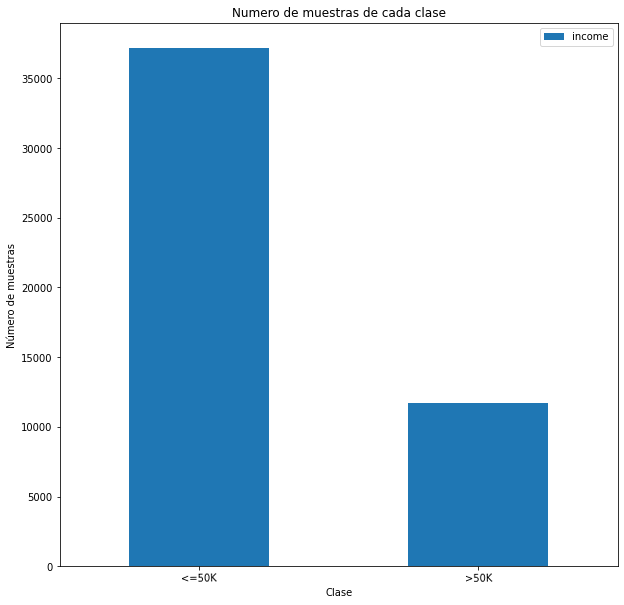

In [11]:
plot = df.income.value_counts().plot(kind="bar", title="Numero de muestras de cada clase", legend=True, figsize=(10,10))
plot.set_xlabel("Clase")
plot.set_ylabel("Número de muestras")
plot.set_xticklabels( ('<=50K', '>50K'), rotation=1)

In [12]:
# eliminamos las columnas que no vamos a utilizar en el analisis
df = df.drop(['fnlwgt'], axis=1)
df = df.drop(['education-num'], axis=1)

In [13]:
# Realizamos la coficacion de las variables categoricas
# en primer lugar listamos las variables que son categoricas
cols_with_categories = [
    'workclass', 
    'education',
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country"
]

In [14]:
# Trabajar con los datos perdidos

print("Datos perdidos por columnas: ")
print(df.isnull().sum(axis=0).sort_values(ascending = False).head(15))
print("\nDatos perdidos por filas: ")
print(df.isnull().sum(axis=1).sort_values(ascending = False).head(15))

Datos perdidos por columnas: 
occupation        2810
workclass         2800
native-country     858
income               1
hours-per-week       1
captial-loss         1
capital-gain         1
sex                  1
race                 1
relationship         1
marital-status       1
education            1
age                  0
dtype: int64

Datos perdidos por filas: 
32561    12
45138     3
20480     3
34722     3
3579      3
43070     3
39362     3
20333     3
35636     3
12996     3
3834      3
35174     3
23915     3
32525     3
30369     3
dtype: int64


In [15]:
df2 = df.copy()
print(df2.shape)


# En primer lugar eliminamos los datos que tengan mas de un 10 % de 
# valores perdidos
df.dropna(thresh=df.shape[1]-1, inplace=True, axis=0)

print("\nDatos perdidos por filas: ")
print(df.isnull().sum(axis=1).sort_values(ascending = False))

print("\nDatos perdidos por columnas: ")
print(df.isnull().sum(axis=0).sort_values(ascending = False).head(30))

(48843, 13)

Datos perdidos por filas: 
29888    1
37713    1
40004    1
28500    1
29786    1
        ..
32391    0
32390    0
32389    0
32388    0
0        0
Length: 46043, dtype: int64

Datos perdidos por columnas: 
native-country    811
occupation         10
income              0
hours-per-week      0
captial-loss        0
capital-gain        0
sex                 0
race                0
relationship        0
marital-status      0
education           0
workclass           0
age                 0
dtype: int64


In [16]:
# Para los valores con menos de 10% de los valores perdidos aproximamos por 
# una multinomial con el resto de valores en la columna
# En este caso las columnas con valores perdidos que quedan son
# native-country y occupation

s = df["native-country"].value_counts(normalize=True)
missing = df["native-country"].isnull()
df.loc[missing,"native-country"] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

s = df["occupation"].value_counts(normalize=True)
missing = df["occupation"].isnull()
df.loc[missing,"occupation"] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

print("Datos perdidos por filas despues del procesado: ")
print(df.isnull().sum(axis=1).sort_values(ascending = False))


print("\nDatos perdidos por columnas despues del procesado: ")
print(df.isnull().sum(axis=0).sort_values(ascending = False).head(30))

Datos perdidos por filas despues del procesado: 
48842    0
16248    0
16268    0
16267    0
16266    0
        ..
32523    0
32522    0
32521    0
32520    0
0        0
Length: 46043, dtype: int64

Datos perdidos por columnas despues del procesado: 
income            0
native-country    0
hours-per-week    0
captial-loss      0
capital-gain      0
sex               0
race              0
relationship      0
occupation        0
marital-status    0
education         0
workclass         0
age               0
dtype: int64


In [17]:
# sustituimos las variables categoricas por una codificacion de 1s y 0s
print("Tamaño antes del conjunto de datos antes de recodificar las variables: {}".format(df.shape))
df = pd.get_dummies(data=df, columns=cols_with_categories)
print("Tamaño antes del conjunto de datos despues de recodificar las variables: {}".format(df.shape))

Tamaño antes del conjunto de datos antes de recodificar las variables: (46043, 13)
Tamaño antes del conjunto de datos despues de recodificar las variables: (46043, 104)


In [18]:
df

,age,capital-gain,captial-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,2174.0,0.0,40.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0.0,0.0,13.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,0.0,0.0,40.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,0.0,0.0,40.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0.0,0.0,40.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,33,0.0,0.0,40.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48838,39,0.0,0.0,36.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,38,0.0,0.0,50.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48841,44,5455.0,0.0,40.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# creamos los conjuntos de training y de test
X, y = df[df.columns.difference(['income'])], df['income']
X, y = shuffle(X, y, random_state=SEED)
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.8, stratify=y)

In [20]:
# creamos la pipeline de preprocesado
preproc = [
    ("var", VarianceThreshold(0.01)),   
    ("standardize", StandardScaler()),      
    ("lasso", SelectFromModel(estimator=LassoCV(tol=0.01))),
]

In [21]:
p = Pipeline(preproc)

In [22]:
x_train_prep = p.fit_transform(train_x, train_y)
print("Descripción de los datos antes y después del preprocesado")
print("Antes: {}".format(train_x.shape))
print("Despues: {}".format(x_train_prep.shape))

Descripción de los datos antes y después del preprocesado
Antes: (9208, 103)
Despues: (9208, 48)


In [23]:
# Modelo lineal

preproc_lin = [
    ("var", VarianceThreshold(0.01)),   
    ("standardize", StandardScaler()),      
    ("poly",PolynomialFeatures(1)), 
    ("lasso", SelectFromModel(estimator=LassoCV(tol=0.01))),
]

pipe_lineal = Pipeline(steps=preproc_lin+[('estimator', LogisticRegression())])
params_lineal = {
    'estimator':[LogisticRegression(max_iter=500)],
    'estimator__solver':['lbfgs'],
    'estimator__C': np.logspace(-6, 6, 4),
    'estimator__penalty': ['l2'],
    'poly__degree': [1,2],
    'estimator__tol': [1e-3, 1e-4, 1e-2]
}
best_clf_lin = GridSearchCV(pipe_lineal, params_lineal, scoring = 'f1',cv = 5, n_jobs = -1, verbose=1)

In [24]:
# Entrenamos
best_clf_lin.fit(train_x, train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.2min finished
/home/yabirgb/Documents/uni/Proyecto-Final---AA/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('var',
                                        VarianceThreshold(threshold=0.01)),
                                       ('standardize', StandardScaler()),
                                       ('poly', PolynomialFeatures(degree=1)),
                                       ('lasso',
                                        SelectFromModel(estimator=LassoCV(tol=0.01))),
                                       ('estimator', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'estimator': [LogisticRegression(C=100.0, max_iter=500,
                                                          tol=0.001)],
                         'estimator__C': array([1.e-06, 1.e-02, 1.e+02, 1.e+06]),
                         'estimator__penalty': ['l2'],
                         'estimator__solver': ['lbfgs'],
                         'estimator__tol': [0.001, 0.0001, 0.01],
                         'poly__degree': [1, 2]},
     

In [25]:
print("Mejores parámetros para LR: ")
best_clf_lin.best_params_

Mejores parámetros para LR: 


{'estimator': LogisticRegression(C=100.0, max_iter=500, tol=0.001),
 'estimator__C': 100.0,
 'estimator__penalty': 'l2',
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.001,
 'poly__degree': 2}

In [26]:
print("F1 en training:", round(100.0 * best_clf_lin.score(train_x, train_y), 5))
print("F1 en test: ", round(100.0 * best_clf_lin.score(test_x, test_y),5))

F1 en training: 72.37175
F1 en test:  66.40552


In [27]:
# Random Forest
pipe_lineal = Pipeline(steps=preproc+[('estimator', RandomForestClassifier(random_state = SEED))])
params_lineal = {
    'estimator':[RandomForestClassifier(random_state = SEED)],
    'estimator__criterion': ['gini','entropy'],
    'estimator__max_features': ['sqrt'],
    'estimator__bootstrap':['True'],
    'estimator__min_samples_split': [2,3,4,5]
}
best_clf_random = GridSearchCV(pipe_lineal, params_lineal, scoring = 'f1',cv = 5, n_jobs = -1, verbose=1)

In [28]:
best_clf_random.fit(train_x, train_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('var',
                                        VarianceThreshold(threshold=0.01)),
                                       ('standardize', StandardScaler()),
                                       ('lasso',
                                        SelectFromModel(estimator=LassoCV(tol=0.01))),
                                       ('estimator',
                                        RandomForestClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier(bootstrap='True',
                                                              max_features='sqrt',
                                                              min_samples_split=5,
                                                              random_state=1)],
                         'estimator__bootstrap': ['True'],
                         'estimator__criterion': ['gini', 'entropy'],
                         'estimat

In [29]:
print("Mejores parámetros para RF: ")
best_clf_random.best_params_

Mejores parámetros para RF: 


{'estimator': RandomForestClassifier(bootstrap='True', max_features='sqrt',
                        min_samples_split=5, random_state=1),
 'estimator__bootstrap': 'True',
 'estimator__criterion': 'gini',
 'estimator__max_features': 'sqrt',
 'estimator__min_samples_split': 5}

In [30]:
print("F1 en training:", round(100.0 * best_clf_random.score(train_x, train_y),5))
print("F1 en test: ", round(100.0 * best_clf_random.score(test_x, test_y),5))

F1 en training: 90.33432
F1 en test:  66.77672


In [31]:
# Perceptron
pipe_perceptron = Pipeline(steps=preproc_lin+[('estimator', Perceptron(random_state = SEED))])
params_perceptron = {
    'estimator':[Perceptron(random_state = SEED)],
    'estimator__penalty': ['l1'],
    'estimator__alpha':[1.0, 1e-2, 1e-3, 1e-4, 2, 5],
    'estimator__max_iter':[2000],
    'estimator__tol': np.logspace(-6, 1, 3),
    'estimator__shuffle': [True],
    'poly__degree': [1,2]
}
best_clf_perceptron = GridSearchCV(pipe_perceptron, params_perceptron, scoring = 'f1',cv = 5, n_jobs = -1, verbose=1)# 

In [32]:
best_clf_perceptron.fit(train_x, train_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.6min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('var',
                                        VarianceThreshold(threshold=0.01)),
                                       ('standardize', StandardScaler()),
                                       ('poly', PolynomialFeatures(degree=1)),
                                       ('lasso',
                                        SelectFromModel(estimator=LassoCV(tol=0.01))),
                                       ('estimator',
                                        Perceptron(random_state=1))]),
             n_jobs=-1,
             param_grid={'estimator': [Perceptron(max_iter=2000, penalty='l1',
                                                  random_state=1, tol=10.0)],
                         'estimator__alpha': [1.0, 0.01, 0.001, 0.0001, 2, 5],
                         'estimator__max_iter': [2000],
                         'estimator__penalty': ['l1'],
                         'estimator__shuffle': [True],
                   

In [33]:
print("F1 en training:", round(100.0 * best_clf_perceptron.score(train_x, train_y),5))
print("F1 en test: ", round(100.0 * best_clf_perceptron.score(test_x, test_y),5))

F1 en training: 65.44315
F1 en test:  60.43744


In [34]:
print("Mejores parámetros para Perceptron: ")
best_clf_perceptron.best_params_

Mejores parámetros para Perceptron: 


{'estimator': Perceptron(max_iter=2000, penalty='l1', random_state=1, tol=10.0),
 'estimator__alpha': 0.0001,
 'estimator__max_iter': 2000,
 'estimator__penalty': 'l1',
 'estimator__shuffle': True,
 'estimator__tol': 10.0,
 'poly__degree': 2}

In [35]:
# MLP
pipe_MLP = Pipeline(steps=preproc+[('estimator', MLPClassifier(random_state = SEED))])
params_MLP = {
    'estimator__activation': ['logistic', 'tanh', 'relu'],
    'estimator__solver': ['lbfgs'],
    'estimator__alpha': [1.0, 1e-2, 1e-3, 1e-4, 2, 5, 10],
    'estimator__max_fun': [20000]
}
best_clf_mlp = GridSearchCV(pipe_MLP, params_MLP, scoring = 'f1',cv = 5, n_jobs = -1, verbose=1)# 

In [36]:
best_clf_mlp.fit(train_x, train_y)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:  3.7min finished
/home/yabirgb/Documents/uni/Proyecto-Final---AA/env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('var',
                                        VarianceThreshold(threshold=0.01)),
                                       ('standardize', StandardScaler()),
                                       ('lasso',
                                        SelectFromModel(estimator=LassoCV(tol=0.01))),
                                       ('estimator',
                                        MLPClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid={'estimator__activation': ['logistic', 'tanh', 'relu'],
                         'estimator__alpha': [1.0, 0.01, 0.001, 0.0001, 2, 5,
                                              10],
                         'estimator__max_fun': [20000],
                         'estimator__solver': ['lbfgs']},
             scoring='f1', verbose=1)

In [37]:
print("Mejores parámetros para MLP: ")
best_clf_mlp.best_params_

Mejores parámetros para MLP: 


{'estimator__activation': 'logistic',
 'estimator__alpha': 5,
 'estimator__max_fun': 20000,
 'estimator__solver': 'lbfgs'}

In [38]:
print("F1 en training:", round(100.0 * best_clf_mlp.score(train_x, train_y),5))
print("F1 en test: ", round(100.0 * best_clf_mlp.score(test_x, test_y),5))

F1 en training: 74.09133
F1 en test:  66.60767


In [39]:
# SVM
pipe_SVM = Pipeline(steps=preproc+[('estimator', SVC(gamma = "scale", kernel="rbf"))])
params_SVM = {
    'estimator__C': [0.1, 1, 2, 5, 7, 10],
}
best_clf_svm = GridSearchCV(pipe_SVM, params_SVM, scoring = 'f1',cv = 5, n_jobs = -1, verbose=1)# 

In [40]:
best_clf_svm.fit(train_x, train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   24.5s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('var',
                                        VarianceThreshold(threshold=0.01)),
                                       ('standardize', StandardScaler()),
                                       ('lasso',
                                        SelectFromModel(estimator=LassoCV(tol=0.01))),
                                       ('estimator', SVC())]),
             n_jobs=-1, param_grid={'estimator__C': [0.1, 1, 2, 5, 7, 10]},
             scoring='f1', verbose=1)

In [41]:
print("Mejores parámetros para SVM: ")
best_clf_svm.best_params_

Mejores parámetros para SVM: 


{'estimator__C': 7}

In [42]:
print("F1 en training:", round(100.0 * best_clf_svm.score(train_x, train_y),5))
print("F1 en test: ", round(100.0 * best_clf_svm.score(test_x, test_y),5))

F1 en training: 77.82679
F1 en test:  64.20312


In [43]:
# Una vez elegidos los mejores  parámetros elegimos el mejor modelo atendiendo al 
# mismo conjunto de valiación cruzada

In [44]:
params_grid = [ {
                'estimator':[LogisticRegression(max_iter=500)],
                'estimator__solver':['lbfgs'],
                'estimator__C': [100],
                'estimator__penalty': ['l2'],
                'estimator__tol': [0.001],
                'poly__degree': [2]
                },
                {
                'estimator': [Perceptron(random_state = SEED)],
                'estimator__penalty': ['l1'],
                'estimator__alpha': [0.0001],
                'estimator__max_iter': [2000],
                'estimator__shuffle': [True],
                'estimator__tol': [10],
                'poly__degree': [2]
                },
                {
                'estimator': [RandomForestClassifier(random_state = SEED)],
                'estimator__criterion': ['entropy'],
                'estimator__max_features': ['sqrt'],
                'estimator__bootstrap':['True'],
                'estimator__min_samples_split': [5]
                },
                {
                'estimator': [MLPClassifier(random_state = SEED)],
                'estimator__activation': ['logistic'],
                'estimator__solver': ['lbfgs'],
                'estimator__alpha': [5],
                'estimator__max_fun': [20000]
                },
                {
                'estimator': [SVC()],
                'estimator__C': [7],
                'estimator__kernel': ['rbf'],
                'estimator__gamma': ['scale']
                }
               # {'estimator':[Any_other_estimator_you_want],
               #  'estimator__valid_param_of_your_estimator':[valid_values]

]

In [45]:
# Entrenamiento del mejor modelo
pipe_model = Pipeline(steps=preproc_lin+[('estimator', SVC(gamma = "scale", kernel="rbf"))])

best_clf = GridSearchCV(pipe_model, params_grid, scoring = 'f1',cv = 5, n_jobs = -1, verbose=1)# 

In [46]:
best_clf.fit(train_x, train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   58.5s finished
/home/yabirgb/Documents/uni/Proyecto-Final---AA/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('var',
                                        VarianceThreshold(threshold=0.01)),
                                       ('standardize', StandardScaler()),
                                       ('poly', PolynomialFeatures(degree=1)),
                                       ('lasso',
                                        SelectFromModel(estimator=LassoCV(tol=0.01))),
                                       ('estimator', SVC())]),
             n_jobs=-1,
             param_grid=[{'estimator': [LogisticRegression(C=100, max_iter=500,
                                                           tol=0.001)],
                          'estimator__C': [100], 'estimato...
                          'estimator__max_features': ['sqrt'],
                          'estimator__min_samples_split': [5]},
                         {'estimator': [MLPClassifier(random_state=1)],
                          'estimator__activation': ['logistic'],
    

In [47]:
print("Mejor modelo obtenido")
best_clf.best_params_

Mejor modelo obtenido


{'estimator': LogisticRegression(C=100, max_iter=500, tol=0.001),
 'estimator__C': 100,
 'estimator__penalty': 'l2',
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.001,
 'poly__degree': 2}

In [48]:
# A continuación vamos a crear dataframes con los resultados para mostrar gráficas

In [49]:
algs = ["LR", "Perceptron", "RandomForest", "MLP", "SVC"]

In [50]:
results = [best_clf.cv_results_["split{}_test_score".format(i)] for i in range(5)]

In [51]:
results

[array([0.65668203, 0.61061061, 0.67128028, 0.66666667, 0.63800905]),
 array([0.68348624, 0.64257028, 0.68720379, 0.68149883, 0.65882353]),
 array([0.7414966 , 0.66464032, 0.72146119, 0.70683662, 0.70506912]),
 array([0.66898148, 0.61904762, 0.65420561, 0.66743649, 0.63754427]),
 array([0.67068758, 0.63137632, 0.66171004, 0.65850673, 0.64311815])]

In [52]:
cv_results = {"Modelo": algs, "f1": results}

In [53]:
cv_results_pandas = pd.DataFrame(results)

In [54]:
cv_results_pandas["Modelo"] = algs

In [55]:
cv_results_pandas

,0,1,2,3,4,Modelo
0,0.656682,0.610611,0.671280,0.666667,0.638009,LR
1,0.683486,0.642570,0.687204,0.681499,0.658824,Perceptron
2,0.741497,0.664640,0.721461,0.706837,0.705069,RandomForest
3,0.668981,0.619048,0.654206,0.667436,0.637544,MLP
4,0.670688,0.631376,0.661710,0.658507,0.643118,SVC


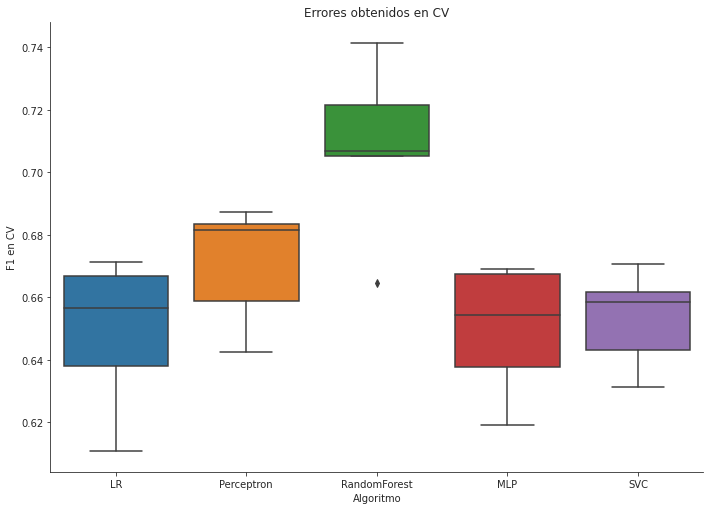

In [56]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
ax.set_title("Errores obtenidos en CV")
ax.set_ylabel("F1 en CV")
ax.set_xlabel("Algoritmo")
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x=algs, y=results)  
sns.despine()
plt.show()

In [57]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc

In [58]:
# Procedemos a obtener las gráficas de preccision vs recall

In [59]:
modelos = [best_clf_lin, best_clf_random, best_clf_mlp]

Logistic: f1=0.664 auc=0.757


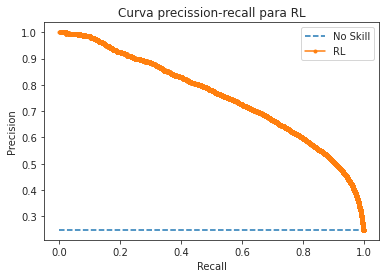

Logistic: f1=0.668 auc=0.764


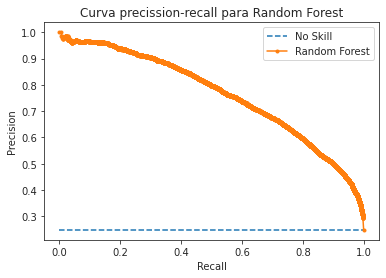

Logistic: f1=0.666 auc=0.764


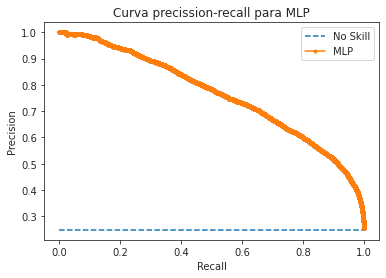

In [60]:
for m, model in zip(["RL", "Random Forest", "MLP"], modelos):
    lr_probs = model.predict_proba(test_x)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # predict class values
    yhat = model.predict(test_x)
    lr_precision, lr_recall, _ = precision_recall_curve(test_y, lr_probs)
    lr_f1, lr_auc = f1_score(test_y, yhat), auc(lr_recall, lr_precision)
    # summarize scores
    print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    no_skill = len(test_y[test_y==1]) / len(test_y)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(lr_recall, lr_precision, marker='.', label=m)
    # axis labels
    plt.title("Curva precission-recall para {}".format(m))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [61]:
# Obtenemos las matrices de confusión para cada modelo obtenido

In [62]:
modelos = [("Regresión logística",best_clf_lin), ("Perceptrón", best_clf_perceptron), ("Random Forest",best_clf_random), ("Perceptrón multicapa", best_clf_mlp), ("SVC",best_clf_svm)]

In [63]:
for name, model in modelos:
    print("Matriz de confusión para {}".format(name))
    y_pred = model.predict(test_x)
    print(confusion_matrix(test_y, y_pred))

Matriz de confusión para Regresión logística
[[25410  2287]
 [ 3459  5679]]
Matriz de confusión para Perceptrón
[[24520  3177]
 [ 3805  5333]]
Matriz de confusión para Random Forest
[[25537  2160]
 [ 3475  5663]]
Matriz de confusión para Perceptrón multicapa
[[25530  2167]
 [ 3493  5645]]
Matriz de confusión para SVC
[[25443  2254]
 [ 3752  5386]]


In [64]:
for name, model in modelos:
    print("Accuracy para el modelo {}: {}.\nE_test:{}\n".format(name, round(accuracy_score(test_y, y_pred),4), round(1-accuracy_score(test_y, y_pred),4)))
    y_pred = model.predict(test_x)

Accuracy para el modelo Regresión logística: 0.8369.
E_test:0.1631

Accuracy para el modelo Perceptrón: 0.844.
E_test:0.156

Accuracy para el modelo Random Forest: 0.8105.
E_test:0.1895

Accuracy para el modelo Perceptrón multicapa: 0.847.
E_test:0.153

Accuracy para el modelo SVC: 0.8463.
E_test:0.1537

